In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import math
import datetime
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


#Data Exploration

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
5,7,0.405680,0.253277,0.441420,0.280324,green,Goblin
6,8,0.399331,0.568952,0.618391,0.467901,white,Goblin
7,11,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
8,12,0.314295,0.671280,0.417267,0.227548,blue,Ghost
9,19,0.280942,0.701457,0.179633,0.141183,white,Ghost


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 23.2+ KB


In [6]:
df_train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


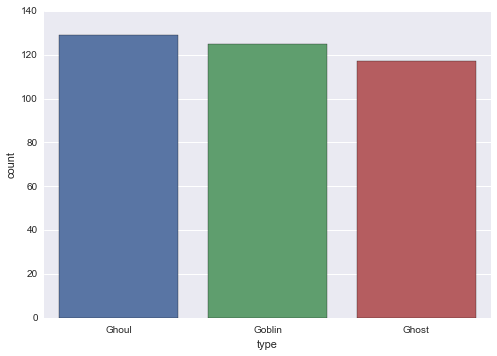

In [10]:
sns.countplot('type',data=df_train)

In [11]:
df_train['type'].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


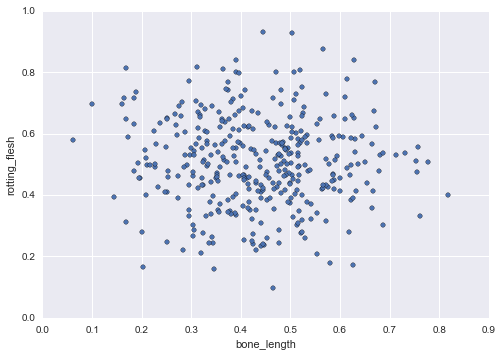

In [12]:
df_train.plot(kind='scatter',x='bone_length',y='rotting_flesh')

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
df_type = df_train['type']

In [15]:
df_type

0       Ghoul
1      Goblin
2       Ghoul
3       Ghoul
4       Ghost
5      Goblin
6      Goblin
7       Ghoul
8       Ghost
9       Ghost
10     Goblin
11      Ghoul
12      Ghoul
13     Goblin
14     Goblin
15      Ghoul
16      Ghost
17      Ghoul
18      Ghoul
19      Ghost
20     Goblin
21      Ghoul
22     Goblin
23      Ghoul
24      Ghoul
25      Ghost
26     Goblin
27     Goblin
28     Goblin
29     Goblin
        ...  
341    Goblin
342     Ghoul
343    Goblin
344     Ghost
345     Ghoul
346    Goblin
347     Ghost
348    Goblin
349     Ghoul
350     Ghost
351    Goblin
352     Ghoul
353    Goblin
354     Ghost
355    Goblin
356    Goblin
357     Ghoul
358     Ghost
359     Ghoul
360     Ghoul
361     Ghoul
362    Goblin
363     Ghost
364    Goblin
365     Ghoul
366    Goblin
367     Ghost
368     Ghoul
369     Ghost
370     Ghoul
Name: type, dtype: object

In [16]:
enc = LabelEncoder()

In [22]:
arr = enc.fit_transform(df_train['type'])

In [18]:
df_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [19]:
type_series = pd.Series?

In [23]:
type_series = pd.Series(data=arr,name='type')

In [24]:
type_series

0      1
1      2
2      1
3      1
4      0
5      2
6      2
7      1
8      0
9      0
10     2
11     1
12     1
13     2
14     2
15     1
16     0
17     1
18     1
19     0
20     2
21     1
22     2
23     1
24     1
25     0
26     2
27     2
28     2
29     2
      ..
341    2
342    1
343    2
344    0
345    1
346    2
347    0
348    2
349    1
350    0
351    2
352    1
353    2
354    0
355    2
356    2
357    1
358    0
359    1
360    1
361    1
362    2
363    0
364    2
365    1
366    2
367    0
368    1
369    0
370    1
Name: type, dtype: int64

In [25]:
df_train.drop('type',axis=1,inplace=True)

In [27]:
arr

array([1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 1, 2, 2, 1, 0, 1, 1, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2,
       1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 1,
       2, 1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 2, 1, 0, 2,
       0, 0, 2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 0, 0, 1, 0,
       2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 1,
       2, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 0, 2, 2, 1, 2, 1, 1, 2, 0, 1,
       1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 2,
       0, 0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2,
       0, 0,

In [28]:
df_train = pd.concat([df_train,type_series],axis=1)

In [29]:
df_train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,1
1,1,0.575560,0.425868,0.531401,0.439899,green,2
2,2,0.467875,0.354330,0.811616,0.791225,black,1
3,4,0.776652,0.508723,0.636766,0.884464,black,1
4,5,0.566117,0.875862,0.418594,0.636438,green,0


In [30]:
for t,marker,c in list(zip(range(3),">ox","rgb")):
    plt.scatter(df_train[arr == t,0],df_train[arr ==t,1],marker= marker,c=c)

TypeError: unhashable type: 'numpy.ndarray'

In [32]:
df_train.drop('id',axis=1,inplace=True)

In [33]:
type_series.to_csv('target.csv')

In [34]:
df_train.to_csv('df_train.csv')

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


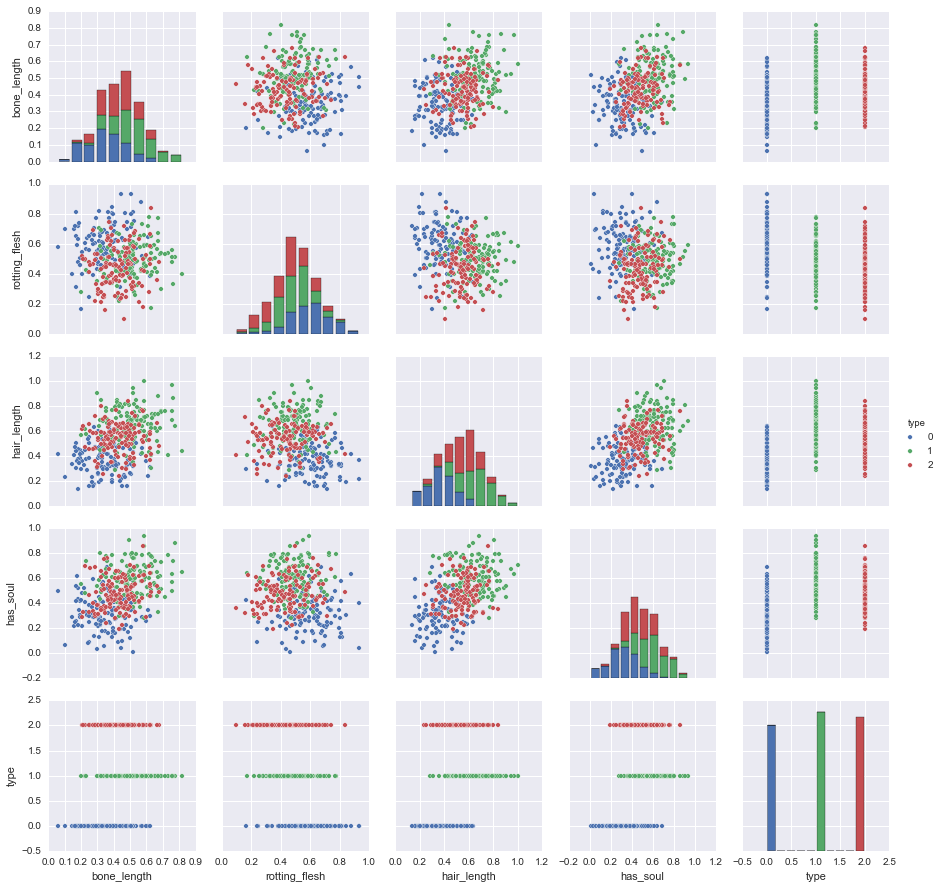

In [35]:
sns.pairplot(df_train, hue="type")

In [47]:
df_train['color'].value_counts()

white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: color, dtype: int64

In [50]:
df_train = pd.concat([df_train,type_series],axis=1)

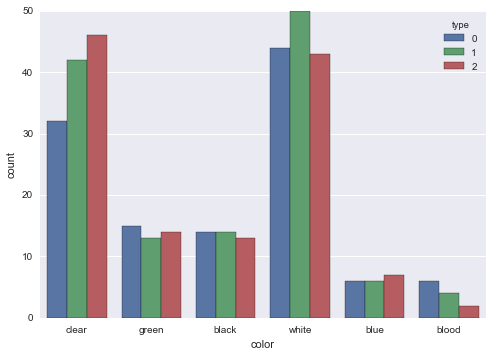

In [51]:
sns.countplot(x='color',hue='type',data=df_train)

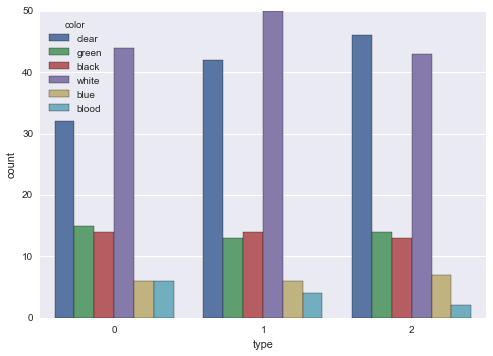

In [52]:
sns.countplot(x='type',hue='color',data=df_train)

In [53]:
color_dummies = pd.get_dummies(df_train['color'])

In [54]:
color_dummies

,black,blood,blue,clear,green,white
0,0,0,0,1,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,0,0,1,0,0
8,0,0,1,0,0,0
9,0,0,0,0,0,1


In [55]:
df_train = pd.concat([df_train,color_dummies],axis=1)

In [56]:
df_color = df_train['color']

In [57]:
df_train.drop('color',axis=1,inplace=True)

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 370
Data columns (total 11 columns):
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
type             371 non-null int64
black            371 non-null float64
blood            371 non-null float64
blue             371 non-null float64
clear            371 non-null float64
green            371 non-null float64
white            371 non-null float64
dtypes: float64(10), int64(1)
memory usage: 34.8 KB


In [59]:
df_train.drop('type',axis=1,inplace=True)

#Model Selection

In [36]:
from sklearn.grid_search import GridSearchCV

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [37]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
n_estimators_list = [50,100,150,200]

In [81]:
max_depth_list = [10,50,100,150,200,250]

In [82]:
parameters = {'n_estimators':n_estimators_list,'max_depth': max_depth_list}

In [83]:
rfr = RandomForestClassifier(n_jobs=-1)

In [42]:
df_train.drop('type',axis=1,inplace=True)

In [70]:
X_train = df_train

In [71]:
y_train = type_series

In [84]:
grid = GridSearchCV(rfr,parameters,cv=10,scoring='accuracy')

In [85]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150, 200], 'max_depth': [10, 50, 100, 150, 200, 250]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [86]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [87]:
grid.best_params_

{'max_depth': 50, 'n_estimators': 200}

In [88]:
grid.best_score_

0.706199460916442

In [77]:
df_train.to_csv('df_train_final.csv')

In [89]:
rfr_1 = RandomForestClassifier(n_estimators=150,max_depth=50,n_jobs=-1)

In [90]:
rfr_1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [7]:
df_test = pd.read_csv('test.csv')

In [105]:
df_test_1 = pd.read_csv('test.csv')

In [106]:
df_test_id = df_test_1['id']

In [8]:
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black


In [94]:
color_dummies_test = pd.get_dummies(df_test['color'])

In [95]:
df_test_color = df_test['color']

In [96]:
df_test_color.value_counts()

white    197
clear    172
black     63
green     53
blue      35
blood      9
Name: color, dtype: int64

In [97]:
df_test.drop('color',axis=1,inplace=True)

In [98]:
df_test = pd.concat([df_test,color_dummies_test],axis=1)

In [99]:
df_test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,black,blood,blue,clear,green,white
0,3,0.471774,0.387937,0.706087,0.698537,1,0,0,0,0,0
1,6,0.427332,0.645024,0.565558,0.451462,0,0,0,0,0,1
2,9,0.549602,0.491931,0.660387,0.449809,1,0,0,0,0,0
3,10,0.638095,0.682867,0.471409,0.356924,0,0,0,0,0,1
4,13,0.361762,0.583997,0.377256,0.276364,1,0,0,0,0,0


In [100]:
df_test.drop('id',axis=1,inplace=True)

In [101]:
y_test = df_test

In [103]:
y_pred = rfr_1.predict(y_test)

In [104]:
y_pred

array([1, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2, 0, 1, 1,
       0, 0, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 1,
       2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0,
       0, 2, 2, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 1, 0, 2,
       0, 2, 1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 2, 1, 1,
       2, 1, 2, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 2, 0, 2, 0,
       1, 2,

In [107]:
y_pred_series = pd.Series(data=y_pred,name='type')

In [108]:
y_pred_series

0      1
1      2
2      1
3      0
4      0
5      0
6      1
7      2
8      2
9      2
10     0
11     1
12     2
13     0
14     1
15     0
16     2
17     0
18     0
19     1
20     1
21     2
22     1
23     2
24     2
25     2
26     1
27     2
28     1
29     2
      ..
499    0
500    2
501    0
502    0
503    2
504    1
505    2
506    1
507    0
508    1
509    2
510    2
511    1
512    0
513    0
514    1
515    1
516    1
517    2
518    2
519    0
520    1
521    2
522    1
523    1
524    2
525    0
526    1
527    0
528    0
Name: type, dtype: int64

In [109]:
df_submission = pd.concat([df_test_id,y_pred_series],axis=1)

In [110]:
df_submission.head()

,id,type
0,3,1
1,6,2
2,9,1
3,10,0
4,13,0


In [111]:
df_submission['type'] = df_submission['type'].map({0:'Ghost',1:'Ghoul',2:'Goblin'})

In [112]:
df_submission

,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Ghost
4,13,Ghost
5,14,Ghost
6,15,Ghoul
7,16,Goblin
8,17,Goblin
9,18,Goblin


In [113]:
df_submission.to_csv('submission.csv')